<a href="https://colab.research.google.com/github/mehmetsiddik/Generalized-Gaussian-Distribution/blob/main/1_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fuzzy_operator_vs_true_set1.png'

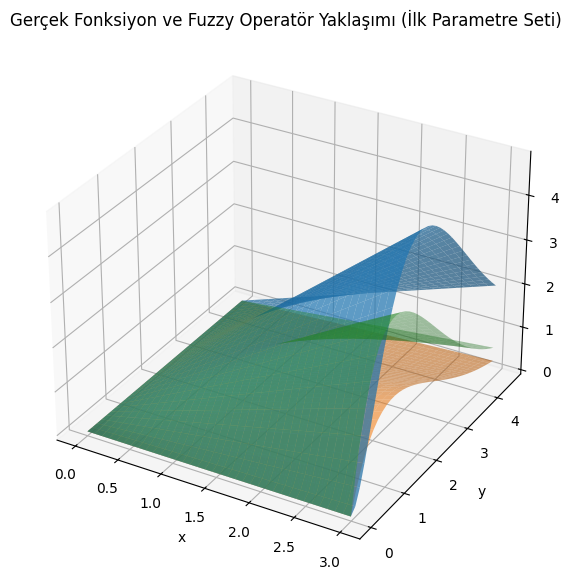

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def f_true(x, y):
    return 3.0 * x * (y**2) * math.exp(-y)

def h_lower(x, y):
    return 2.0 * x * y * math.exp(-y)

def h_upper(x, y):
    return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q):
    return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0
    den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

n = m = 20
p1, q1 = 0.999, 0.9
p2, q2 = 0.999, 0.9
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X)
Z_op_upper = np.zeros_like(X)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_true, alpha=0.7)
ax.plot_surface(X, Y, Z_op_lower, alpha=0.55)
ax.plot_surface(X, Y, Z_op_upper, alpha=0.40)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Değer')
ax.set_title('Gerçek Fonksiyon ve Fuzzy Operatör Yaklaşımı (İlk Parametre Seti)')

out_path = "/mnt/data/fuzzy_operator_vs_true_set1.png"
plt.savefig(out_path, dpi=220, bbox_inches="tight")
plt.show()

out_path


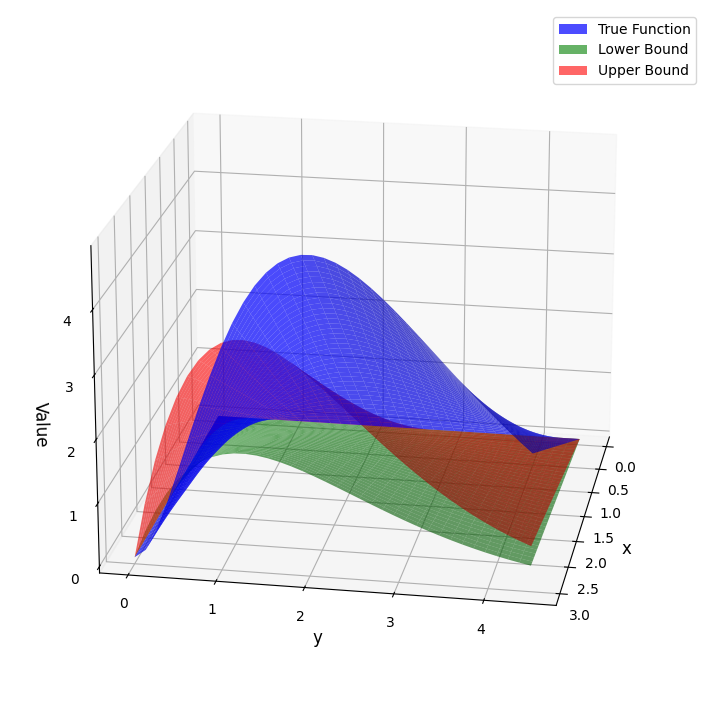

Plot saved as 'fuzzy_operator_vs_true_set1.png' in the current directory


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f_true(x, y):
    return 3.0 * x * (y**2) * math.exp(-y)

def h_lower(x, y):
    return 2.0 * x * y * math.exp(-y)

def h_upper(x, y):
    return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q):
    return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0
    den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

# Parameters
n = m = 20
p1, q1 = 0.999, 0.9
p2, q2 = 0.999, 0.9
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

# Create grid
Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

# Calculate values
Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X)
Z_op_upper = np.zeros_like(X)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

# Create the plot with better colors and styling
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot surfaces with distinct colors and transparency
surf1 = ax.plot_surface(X, Y, Z_true, alpha=0.7, color='blue', label='True Function')
surf2 = ax.plot_surface(X, Y, Z_op_lower, alpha=0.6, color='green', label='Lower Bound')
surf3 = ax.plot_surface(X, Y, Z_op_upper, alpha=0.6, color='red', label='Upper Bound')

# Add labels and title
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('Value', fontsize=12)
#ax.set_title('True Function vs Fuzzy Operator Approximation (First Parameter Set)', fontsize=14)

# Add a legend
# Create proxy artists for the legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', alpha=0.7, label='True Function'),
                   Patch(facecolor='green', alpha=0.6, label='Lower Bound'),
                   Patch(facecolor='red', alpha=0.6, label='Upper Bound')]
ax.legend(handles=legend_elements, loc='upper right')

# Set initial view angle for better visualization
ax.view_init(elev=20, azim=10)

# Save the figure to the current directory to avoid the error
plt.savefig("fuzzy_operator_vs_true_set1.png", dpi=220, bbox_inches="tight")

# Display the plot
plt.show()

print("Plot saved as 'fuzzy_operator_vs_true_set1.png' in the current directory")

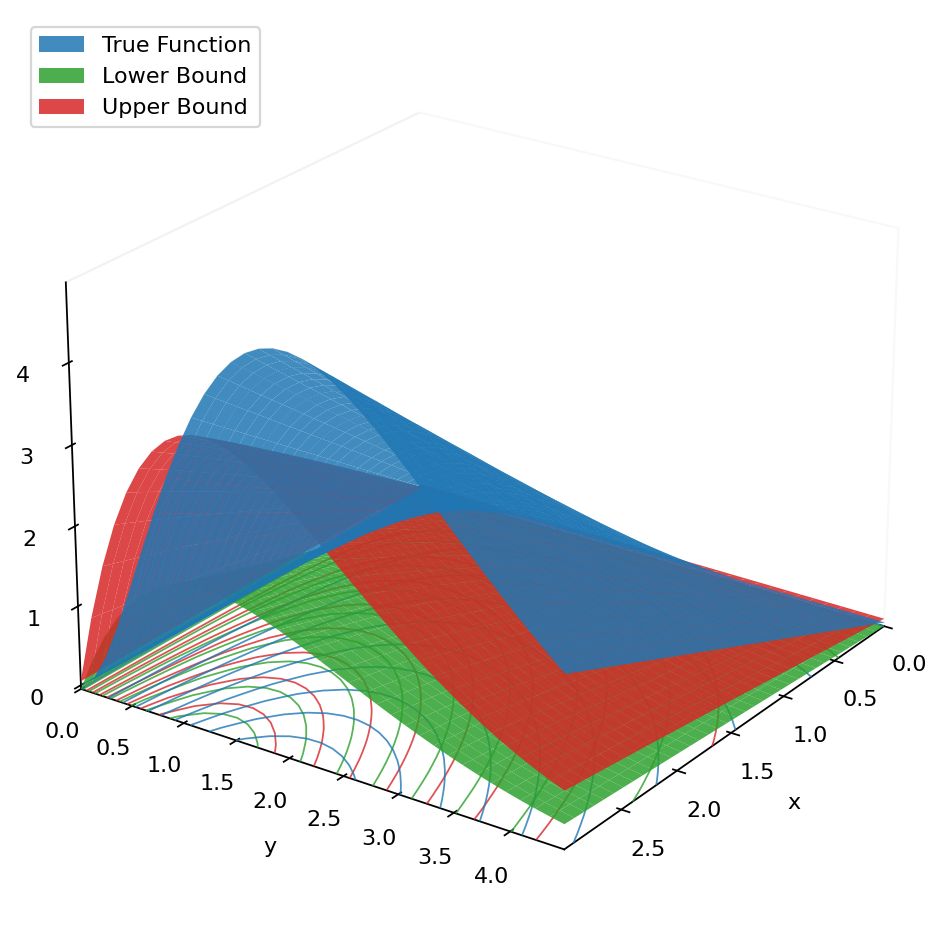

Plot saved as 'fuzzy_operator_vs_true_set1_small.png'


In [ ]:
# Smaller, compact 3D plot
fig = plt.figure(figsize=(8, 6), dpi=160)   # reduce size & keep decent resolution
ax = fig.add_subplot(111, projection='3d')

# Make panes clean/bright for contrast
ax.xaxis.pane.set_facecolor((1, 1, 1, 1))
ax.yaxis.pane.set_facecolor((1, 1, 1, 1))
ax.zaxis.pane.set_facecolor((1, 1, 1, 1))
ax.grid(False)

# Plot order: lower -> true -> upper (so edges are visible and not hidden)
surf_lower = ax.plot_surface(
    X, Y, Z_lower_p,
    rstride=1, cstride=1, linewidth=0, antialiased=True,
    facecolors=cmap_lower(np.zeros_like(Z_lower_p)),
    shade=False, alpha=0.85
)

surf_true = ax.plot_surface(
    X, Y, Z_true_p,
    rstride=1, cstride=1, linewidth=0, antialiased=True,
    facecolors=cmap_true(np.zeros_like(Z_true_p)),
    shade=False, alpha=0.85
)

surf_upper = ax.plot_surface(
    X, Y, Z_upper_p,
    rstride=1, cstride=1, linewidth=0, antialiased=True,
    facecolors=cmap_upper(np.zeros_like(Z_upper_p)),
    shade=False, alpha=0.85
)

# Add thin, neutral wireframe on the "true" surface only (shape cue without clutter)
ax.plot_wireframe(X, Y, Z_true_p, rstride=4, cstride=4, linewidth=0.25, alpha=0.4)

# Base-plane contours (“shadows”) to see where each surface sits in (x,y)
zmin = float(np.nanmin([Z_true_p, Z_lower_p, Z_upper_p]))
ax.contour(X, Y, Z_lower_p, levels=10, zdir='z', offset=zmin, colors=['#2ca02c'], linewidths=0.8, alpha=0.8)
ax.contour(X, Y, Z_true_p,  levels=10, zdir='z', offset=zmin, colors=['#1f77b4'], linewidths=0.8, alpha=0.8)
ax.contour(X, Y, Z_upper_p, levels=10, zdir='z', offset=zmin, colors=['#d62728'], linewidths=0.8, alpha=0.8)

# Labels
ax.set_xlabel('x', fontsize=10, labelpad=6)
ax.set_ylabel('y', fontsize=10, labelpad=6)
ax.set_zlabel('Value', fontsize=10, labelpad=6)

# Tight range and nice view angle
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(np.min(Y), np.max(Y))
ax.set_zlim(zmin, float(np.nanmax([Z_true_p, Z_lower_p, Z_upper_p]) + 0.02 * z_range))
ax.view_init(elev=24, azim=35)

# Legend using solid patches matching the surfaces
legend_elements = [
    Patch(facecolor='#1f77b4', alpha=0.85, label='True Function'),
    Patch(facecolor='#2ca02c', alpha=0.85, label='Lower Bound'),
    Patch(facecolor='#d62728', alpha=0.85, label='Upper Bound'),
]
ax.legend(handles=legend_elements, loc='upper left', frameon=True)
plt.tight_layout()
plt.savefig("fuzzy_operator_vs_true_set1_small.png", dpi=200, bbox_inches="tight")
plt.show()

print("Plot saved as 'fuzzy_operator_vs_true_set1_small.png'")


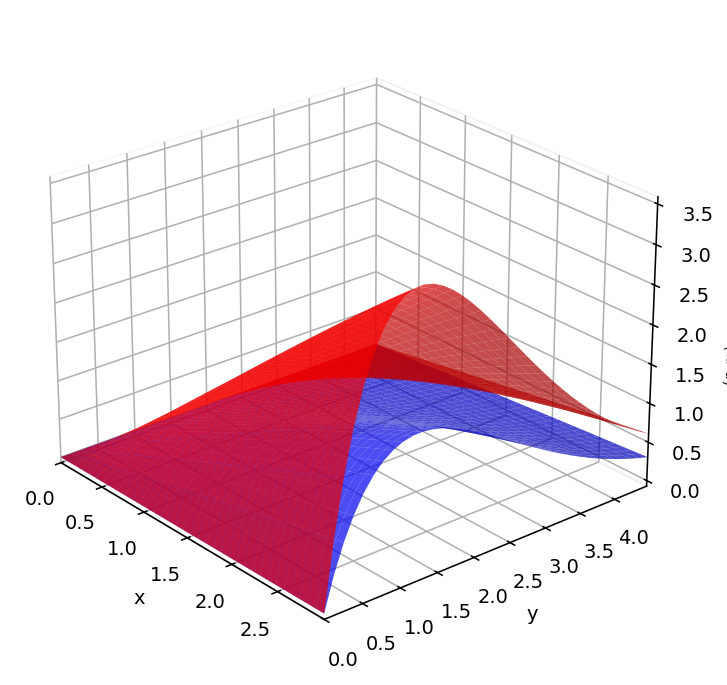

Plot saved as 'compact_fuzzy_plot.png'


In [ ]:
# Compact, minimal 3D plot (similar to your screenshot)
fig = plt.figure(figsize=(6, 5), dpi=140)   # small and clear
ax = fig.add_subplot(111, projection='3d')

# Plot only two surfaces (True vs Upper/Lower, pick whichever you need)
surf1 = ax.plot_surface(X, Y, Z_op_lower, color='blue', alpha=0.7)
surf2 = ax.plot_surface(X, Y, Z_op_upper, color='red', alpha=0.7)

# Axes labels
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel(r'$C_F^{(n,m)}(x,y)$', fontsize=10)

# Tighter axis limits (optional: matches the screenshot)
ax.set_xlim(0, np.max(X))
ax.set_ylim(0, np.max(Y))

# Clean look (no legend, no background shading)
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Nice viewing angle
ax.view_init(elev=25, azim=-40)

plt.tight_layout()
plt.savefig("compact_fuzzy_plot.png", dpi=200, bbox_inches="tight")
plt.show()

print("Plot saved as 'compact_fuzzy_plot.png'")


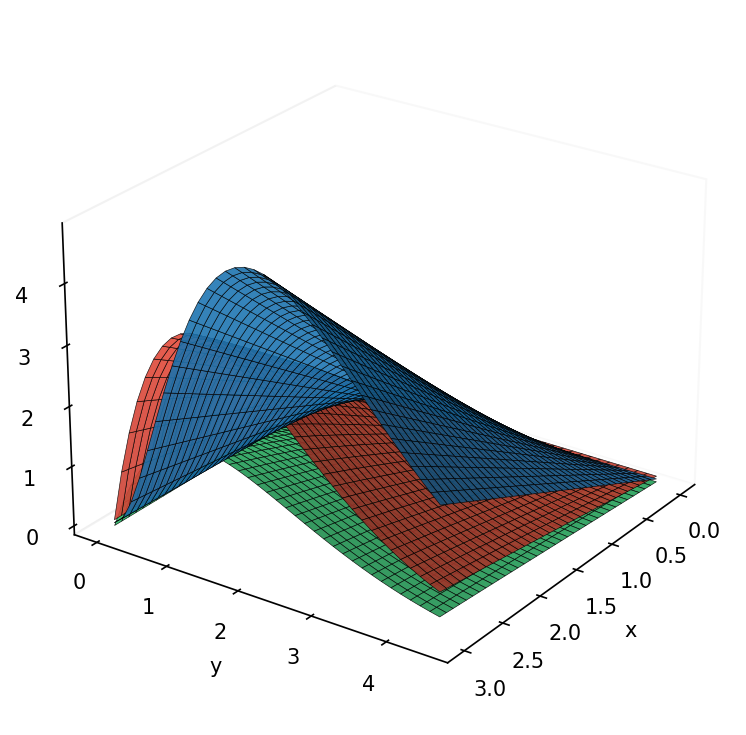

Plot saved as 'fuzzy_operator_clear_colors.png'


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
# Daha net renkler ve belirgin sınırlarla 3D plot
fig = plt.figure(figsize=(6, 5), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Küçük offset hesapla (üst üste binmeyi engellemek için)
z_range = (np.nanmax([Z_true, Z_op_lower, Z_op_upper]) -
           np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
eps = 0.01 * z_range

# Renkleri canlı hex kodlarla seç
c_true  = "#1f77b4"  # canlı mavi
c_lower = "#2ecc71"  # parlak yeşil
c_upper = "#e74c3c"  # parlak kırmızı

# Üç yüzeyi sırayla çiz
surf_lower = ax.plot_surface(
    X, Y, Z_op_lower - eps,
    color=c_lower, alpha=0.9,
    linewidth=0.3, edgecolor="k"
)
surf_true = ax.plot_surface(
    X, Y, Z_true,
    color=c_true, alpha=0.9,
    linewidth=0.3, edgecolor="k"
)
surf_upper = ax.plot_surface(
    X, Y, Z_op_upper + eps,
    color=c_upper, alpha=0.9,
    linewidth=0.3, edgecolor="k"
)

# Eksen etiketleri
ax.set_xlabel("x", fontsize=10)
ax.set_ylabel("y", fontsize=10)
ax.set_zlabel(r"$C_F^{(n,m)}(x,y)$", fontsize=10)

# Temiz arka plan
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(False)

# Sağdan bakış açısı
ax.view_init(elev=25, azim=35)

plt.tight_layout()
plt.savefig("fuzzy_operator_clear_colors.png", dpi=220, bbox_inches="tight")
plt.show()

print("Plot saved as 'fuzzy_operator_clear_colors.png'")


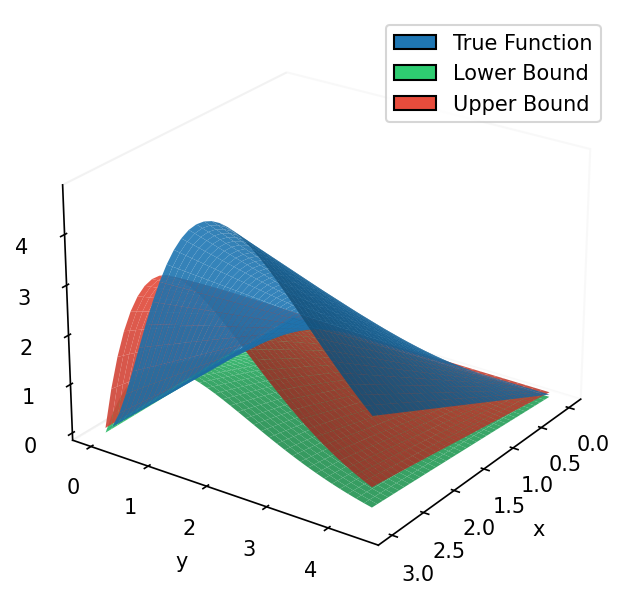

In [6]:
from matplotlib.patches import Patch

# Daha net renklerle 3D plot (alt-orta-üst sıralı)
fig = plt.figure(figsize=(6, 5), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Canlı renkler
c_true  = "#1f77b4"  # mavi
c_lower = "#2ecc71"  # yeşil
c_upper = "#e74c3c"  # kırmızı

# Küçük offset ile üst üste binmeyi engelle
z_range = (np.nanmax([Z_true, Z_op_lower, Z_op_upper]) -
           np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
eps = 0.01 * z_range

# Çizim sırası: önce alt (yeşil), sonra orta (mavi), en üst (kırmızı)
surf_lower = ax.plot_surface(X, Y, Z_op_lower - eps,
                             color=c_lower, alpha=0.9,
                             linewidth=0, antialiased=True)
surf_true = ax.plot_surface(X, Y, Z_true,
                            color=c_true, alpha=0.9,
                            linewidth=0, antialiased=True)
surf_upper = ax.plot_surface(X, Y, Z_op_upper + eps,
                             color=c_upper, alpha=0.9,
                             linewidth=0, antialiased=True)

# Eksen etiketleri
ax.set_xlabel("x", fontsize=10)
ax.set_ylabel("y", fontsize=10)
ax.set_zlabel(r"$C_F^{(n,m)}(x,y)$", fontsize=10)

# Temiz arka plan
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(False)

# Sağdan görünüm#
ax.view_init(elev=25, azim=35)

# Legend ekle (tam sizin gösterdiğiniz gibi)
legend_elements = [
    Patch(facecolor=c_true,  edgecolor='k', label='True Function'),
    Patch(facecolor=c_lower, edgecolor='k', label='Lower Bound'),
    Patch(facecolor=c_upper, edgecolor='k', label='Upper Bound')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

#plt.tight_layout()
plt.savefig("fuzzy_operator_ordered_layers.png", dpi=220, bbox_inches="tight")
plt.show()

#print("Plot saved as 'fuzzy_operator_ordered_layers.png'")
